In [1]:
import sys ###qmdp1header
sys.path.append('../scripts/')
from dp_policy_agent import *
from dynamic_programming import * #追加

In [2]:
class QmdpAgent(DpPolicyAgent): #このセルを追加 ###qmdp1
    def __init__(self, time_interval, estimator, goal, puddles, sampling_num=10, widths=np.array([0.2, 0.2, math.pi/18]).T, \
                 puddle_coef=100.0, lowerleft=np.array([-4, -4]).T, upperright=np.array([4, 4]).T): 
        super().__init__(time_interval, estimator, goal, puddle_coef, widths, lowerleft, upperright)
        
        self.dp = DynamicProgramming(widths, goal, puddles, time_interval, sampling_num) #DPのオブジェクトを持たせる
        self.dp.value_function = self.init_value()                                                                            #ファイルから読み込んで価値関数をセット
        
    def init_value(self): #追加
        tmp = np.zeros(self.dp.index_nums)
        for line in open("value.txt", "r"):
            d = line.split()
            tmp[int(d[0]), int(d[1]), int(d[2])] = float(d[3])
            
        return tmp

In [3]:
def trial(animation):  ###qmdp1trial
    time_interval = 0.1
    world = PuddleWorld(30, time_interval, debug=not animation) 

    ##ランドマークの追加（意地悪な位置に）##
    m = Map()
    m.append_landmark(Landmark(1,4))
    m.append_landmark(Landmark(4,1))
    m.append_landmark(Landmark(-4,-4))
    world.append(m)
    
    ##ゴール・水たまりの追加（これは特に変更なし）##
    goal = Goal(-3,-3)
    puddles = [Puddle((-2, 0), (0, 2), 0.1), Puddle((-0.5, -2), (2.5, 1), 0.1)] 
    world.append(goal)
    world.append(puddles[0]) 
    world.append(puddles[1])
    
    ##ロボットを作る##
    init_pose = np.array([2.5, 2.5, 0]).T
    pf = Mcl(m, init_pose, 100)
    a = QmdpAgent(time_interval, pf, goal, puddles)                             #変更
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")

    world.append(r)
    world.draw()
    
    return a

<IPython.core.display.Javascript object>


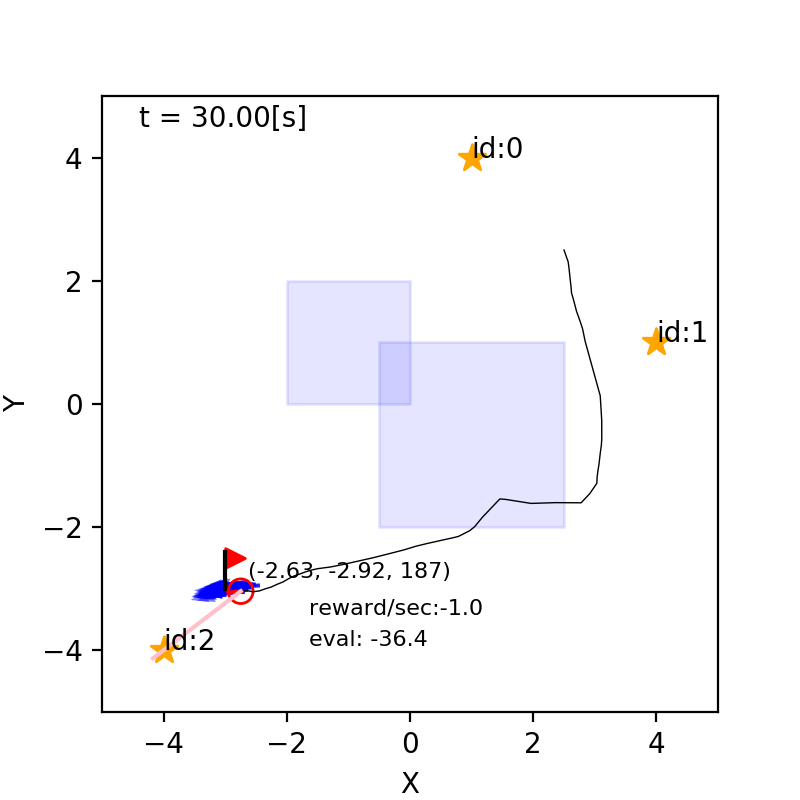

array([[[ -1.77614585,  -1.69314557,  -1.60814698, ...,  -2.0262018 ,
          -1.94286581,  -1.85954579],
        [ -1.5651253 ,  -1.4835767 ,  -1.39131969, ...,  -1.81542513,
          -1.73207752,  -1.64881558],
        [ -1.34531757,  -1.26111159,  -1.18214149, ...,  -1.59517096,
          -1.51184461,  -1.42847637],
        ...,
        [ -7.45001526,  -7.53334859,  -7.61668192, ...,  -7.2000142 ,
          -7.2833488 ,  -7.36668188],
        [ -7.65408871,  -7.73742203,  -7.82075537, ...,  -7.40408735,
          -7.4874223 ,  -7.57075531],
        [ -7.85788447,  -7.94121779,  -8.02455113, ...,  -7.60788288,
          -7.69121811,  -7.77455106]],

       [[ -1.67232842,  -1.58918122,  -1.50491721, ...,  -1.92235969,
          -1.83902487,  -1.75569898],
        [ -1.46141503,  -1.37849283,  -1.29310381, ...,  -1.7114841 ,
          -1.62814748,  -1.54483059],
        [ -1.22720096,  -1.14620847,  -1.05117093, ...,  -1.47759422,
          -1.39424216,  -1.31100246],
        ...,


In [4]:
a = trial(True) #qmdp1exec
a.dp.value_function